# 02 - Randomised Experiments


## The Golden Standard

In the previous session, we saw why and how association is different from causation. We also saw what is required to make association be causation.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$


To recap, association becomes causation if there is no bias. There will be no bias if $E[Y_0|T=0]=E[Y_0|T=1]$. In words, association will be causation if the treated and control are equal or comparable, except for their treatment. Or, in more technical words, when the outcome of the untreated is equal to the counterfactual outcome of the treated. Remember that this counterfactual outcome is the outcome of the treated group if they had not received the treatment.

I think we did an OK job explaining how to make association equal to causation in math terms. But that was only in theory. Now, we look at the first tool we have to make the bias vanish: **Randomised Experiments**. Randomised experiments randomly assign individuals in a population to a treatment or to a control group. The proportion that receives the treatment doesn't have to be 50%. You could have an experiment where only 10% of your samples get the treatment.

Randomisation annihilates bias by making the potential outcomes independent of the treatment.

$
(Y_0, Y_1) \perp\!\!\!\perp T
$

This can be confusing at first (it was for me). But don't worry, my brave and true fellow, I'll explain it further. If the outcome is independent of the treatment, doesn't this also imply that the treatment has no effect? Well, yes! But notice I'm not talking about the outcomes. Instead, I'm talking about the **potential** outcomes. The potential outcome is how the outcome **would have been** under treatment ($Y_1$) or under control ($Y_0$). In randomized trials, we **don't** want the outcome to be **independent** of the treatment since we think **the treatment causes** the outcome. But we want the **potential** outcomes to be independent of the treatment. 

![img](./data/img/rct/indep.png)

Saying that the potential outcomes are independent of the treatment is saying that they would be, in expectation, the same in the treatment or the control group. In simpler terms, it means that treatment and control groups are comparable. Or that knowing the treatment assignment doesn't give me any information on how the outcome was previous to the treatment. Consequently, $(Y_0, Y_1)\perp T$ means that the treatment is the only thing generating a difference between the outcome in the treated and in the control group. To see this, notice that independence implies precisely that

$
E[Y_0|T=0]=E[Y_0|T=1]=E[Y_0]
$

Which, as we've seen, makes it so that

$
E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0]=ATE
$

So, randomization gives us a way to use a simple difference in means between treatment and control and call that the treatment effect.


## In a School Far, Far Away

In 2020, the Coronavirus Pandemic forced businesses to adapt to social distancing. Delivery services became widespread, and big corporations shifted to a remote work strategy. With schools, it wasn't different. Many started their own online repository of classes. 

Four months into the crisis, many wonder if the introduced changes could be maintained. There is no question that online learning has its benefits. It is cheaper since it can save on real estate and transportation. It can also be more digital, leveraging world-class content from around the globe, not just from a fixed set of teachers. Despite all of that, we still need to answer if online learning has a negative or positive impact on the student's academic performance.

One way to answer this is to take students from schools that give mostly online classes and compare them with students from schools that provide lectures in traditional classrooms. As we know by now, this is not the best approach. It could be that online schools attract only the well-disciplined students that do better than average even if the class were presential. In this case, we would have a positive bias, where the treated are academically better than the untreated: $E[Y_0|T=1] > E[Y_0|T=0]$.

Or on the flip side, it could be that online classes are cheaper and are composed chiefly of less wealthy students, who might have to work besides studying. In this case, these students would do worse than those from the presential schools even if they took presential classes. If this was the case, we would have a bias in the other direction, where the treated are academically worse than the untreated:  $E[Y_0|T=1] < E[Y_0|T=0]$. 

So, although we could make simple comparisons, it wouldn't be compelling. One way or another, we could never be sure if there wasn't any bias lurking around and masking our causal effect.

![img](./data/img/rct/lurking_bias.png)

To solve that, we need to make the treated and untreated comparable $E[Y_0|T=1] = E[Y_0|T=0]$. One way to force this is by randomly assigning the online and presential classes to students. If we managed to do that, the treatment and untreated would be, on average, the same, except for the treatment they receive. 

Fortunately, some economists have done that for us. They've randomized classes so that some students were assigned to have face-to-face lectures, others to have only online lessons, and a third group to have a blended format of both online and face-to-face classes. They collected data on a standard exam at the end of the semester.

Here is what the data looks like:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/online_classroom.csv")
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


We can see that we have 323 samples. It's not exactly big data, but something we can work with. To estimate the causal effect, we can simply compute the mean score for each of the treatment groups.

> ### Insert by dataqubit
Start:

In [2]:
len(data)

323

In [4]:
data.format_ol.value_counts()

0    229
1     94
Name: format_ol, dtype: int64

In [5]:
np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 )

array(['face_to_face', 'face_to_face', 'blended', 'blended', 'online',
       'online', 'blended', 'face_to_face', 'face_to_face', 'online',
       'online', 'face_to_face', 'face_to_face', 'blended',
       'face_to_face', 'blended', 'online', 'face_to_face', 'blended',
       'online', 'blended', 'online', 'face_to_face', 'face_to_face',
       'online', 'face_to_face', 'face_to_face', 'blended', 'online',
       'online', 'blended', 'blended', 'blended', 'face_to_face',
       'face_to_face', 'face_to_face', 'face_to_face', 'online',
       'face_to_face', 'blended', 'blended', 'blended', 'blended',
       'face_to_face', 'face_to_face', 'face_to_face', 'face_to_face',
       'face_to_face', 'blended', 'face_to_face', 'blended',
       'face_to_face', 'blended', 'face_to_face', 'face_to_face',
       'face_to_face', 'online', 'blended', 'online', 'face_to_face',
       'blended', 'face_to_face', 'face_to_face', 'online', 'blended',
       'face_to_face', 'blended', 'blended', 'face_

> ### Insert by dataqubit
End.

In [6]:
(data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


> ### Insert by dataqubit
start:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 )))

In [17]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


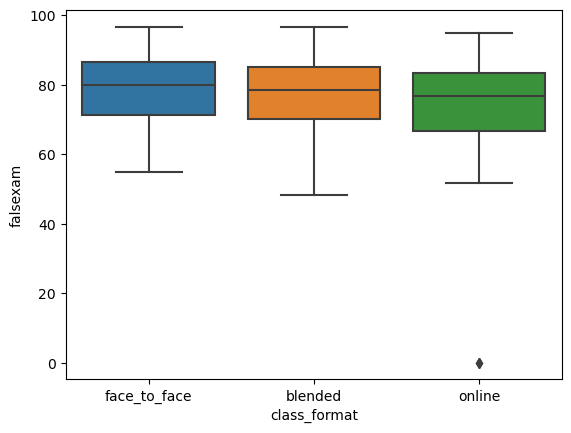

In [20]:

sns.boxplot(data, x='class_format', y='falsexam')
plt.show()

> ### Insert by dataqubit
end.

Yup. It's that simple. We can see that face-to-face classes yield a 78.54 average score, while online courses yield a 73.63 average score. Not so good news for the proponents of online learning. The $ATE$ for an online class is thus -4.91. This means that **online classes cause students to perform about 5 points lower**, on average. That's it. You don't need to worry that online courses might have poorer students that can't afford face-to-face classes or, for that matter, you don't have to worry that the students from the different treatments are different in any way other than the treatment they received. By design, the random experiment is made to wipe out those differences. 

For this reason, a good sanity check to see if the randomisation was done right (or if you are looking at the correct data) is to check if the treated are equal to the untreated in pre-treatment variables. Our data has information on gender and ethnicity to see if they are similar across groups. We can say that they look pretty similar for the `gender`, `asian`, `hispanic`, and `white` variables. The `black` variable, however, seems a little bit different. This draws attention to what happens with a small dataset. Even under randomisation, it could be that, by chance, one group is different from another. In large samples, this difference tends to disappear.

## The Ideal Experiment

Randomised experiments or Randomised Controlled Trials (RCT) are the most reliable way to get causal effects. It's a straightforward technique and absurdly convincing. It is so powerful that most countries have it as a requirement for showing the effectiveness of new medicine. To make a terrible analogy, you can think of RCT as Aang, from Avatar: The Last Airbender, while other techniques are more like Sokka. Sokka is cool and can pull some neat tricks here and there, but Aang can bend the four elements and connect with the spiritual world. Think of it this way, if we could, RCT would be all we would ever do to uncover causality. A well designed RCT is the dream of any scientist.

![img](./data/img/rct/science_dream.png)

Unfortunately, they tend to be either very expensive or just plain unethical. Sometimes, we simply can't control the assignment mechanism. Imagine yourself as a physician trying to estimate the effect of smoking during pregnancy on baby weight at birth. You can't simply force a random portion of moms to smoke during pregnancy. Or say you work for a big bank, and you need to estimate the impact of the credit line on customer churn. It would be too expensive to give random credit lines to your customers. Or that you want to understand the impact of increasing the minimum wage on unemployment. You can't simply assign countries to have one or another minimum wage. You get the point.

We will later see how to lower the randomisation cost by using conditional randomisation, but there is nothing we can do about unethical or unfeasible experiments. Still, whenever we deal with causal questions, it is worth thinking about the **ideal experiment**. Always ask yourself, if you could, **what would be the perfect experiment you would run to uncover this causal effect?** This tends to shed some light on the way how we can discover the causal effect even without the ideal experiment.


## The Assignment Mechanism

In a randomised experiment, the mechanism that assigns units to one treatment or the other is, well, random. As we will see later, all causal inference techniques will somehow try to identify the assignment mechanisms of the treatments. When we know for sure how this mechanism behaves, causal inference will be much more confident, even if the assignment mechanism isn't random.

Unfortunately, the assignment mechanism can't be discovered by simply looking at the data. For example, if you have a dataset where higher education correlates with wealth, you can't know for sure which one caused which by just looking at the data. You will have to use your knowledge about how the world works to argue in favor of a plausible assignment mechanism: is it the case that schools educate people, making them more productive and leading them to higher-paying jobs. Or, if you are pessimistic about education, you can say that schools do nothing to increase productivity, and this is just a spurious correlation because only wealthy families can afford to have a kid get a higher degree.

In causal questions, we usually can argue in both ways: that X causes Y, or that it is a third variable Z that causes both X and Y, and hence the X and Y correlation is just spurious. For this reason, knowing the assignment mechanism leads to a much more convincing causal answer. This is also what makes causal inference so exciting. While applied ML is usually just pressing some buttons in the proper order, applied causal inference requires you to seriously think about the mechanism generating that data. 


## Key Ideas

We looked at how randomised experiments are the simplest and most effective way to uncover causal impact. It does this by making the treatment and control groups comparable. Unfortunately, we can't do randomised experiments all the time, but it is still helpful to think about what is the ideal experiment we would do if we could.

Someone familiar with statistics might be protesting right now that I didn't look at the variance of my causal effect estimate. How can I know that a 4.91 points decrease is not due to chance? In other words, how can I know if the difference is statistically significant? And they would be right. Don't worry. I intend to review some statistical concepts next. 


## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

The data used here is from a study of Alpert, William T., Kenneth A. Couch, and Oskar R. Harmon. 2016. ["A Randomized Assessment of Online Learning"](https://www.aeaweb.org/articles?id=10.1257/aer.p20161057). American Economic Review, 106 (5): 378-82.

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).

> ### Insert by dataqubit
start.

### Optional Pandas Exercises for those who started to learn it:

* Work with exams data to do a sanity check mentioned in the text.

> ### Insert by dataqubit
end.